# Seaborn 빈도그래프 2
- 데이터의 빈도를 표현하는 다른 방법들
- `statsmodels` 패키지 설치 필요

### 1. 작업 준비

In [60]:
# 패키지 참조
import sys
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel
from statsmodels.graphics.mosaicplot import mosaic

# 데이터 가져오기 및 전처리
titanic = read_excel("https://data.hossam.kr/D01/titanic.xlsx", index_col="PassengerId")
df = titanic.astype({"Survived": "category", "Pclass": "category", "Sex": "category", 
                     "Cabin": "category", "Embarked": "category"})
df.head()

# 그래프 전역 설정
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (5, 3)
plt.rcParams["axes.unicode_minus"] = False

### 2. `.Countplot()`
- 데이터의 빈도를 표현하는 가장 간편한 방법
- `.catplot()` 에서 `kind` 값이 `count` 로 고정되어 있는 형태

#### 1) x축에 설정된 집단별 빈도수 확인

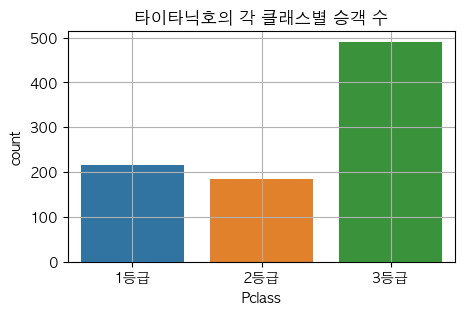

In [7]:
sb.countplot(data=df, x='Pclass')
plt.title("타이타닉호의 각 클래스별 승객 수")
plt.xticks([0, 1, 2], ['1등급', '2등급', '3등급'])
plt.grid()
plt.show()
plt.close()

#### 2) 범주 추가
- `hue` 파라미터 추가

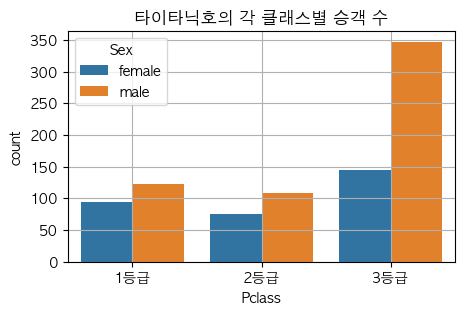

In [9]:
sb.countplot(data=df, x="Pclass", hue='Sex')
plt.title("타이타닉호의 각 클래스별 승객 수")
plt.xticks([0, 1, 2], ['1등급', '2등급', '3등급'])
plt.grid()
plt.show()
plt.close()

### 3. 모자이크 그래프
- 막대그래프 외에도 변량이 모두 범주형인 다차원 데이터를 시각화할 때 모자이크 그래프(mosaic plot)를 사용하기도 함
- : 그룹 내의 `데이터 백분율`을 보여주는 `누적 막대그래프`로 
- : 변수가 3개 이상일 때도 사용 가능
- : `statsmodels.graphics.mosaicplot` 패키지의 `mosaic()` 함수를 이용해서 그림

#### 1) 한가지 변수에 대한 비율 표시

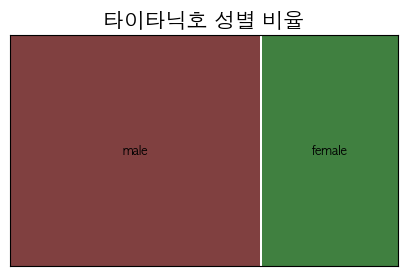

In [14]:
mosaic(df, ['Sex'], axes_label=False)

plt.title('타이타닉호 성별 비율', fontsize=15)
plt.show()
plt.close()

#### 2) 2개 이상 범주에 대한 비율 표시

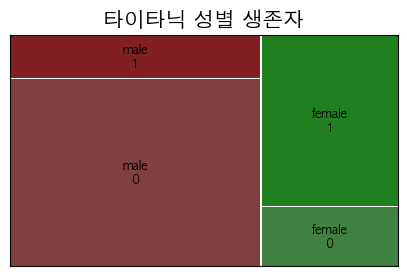

In [18]:
mosaic (df, ['Sex', 'Survived'], axes_label = False)
plt.title('타이타닉 성별 생존자', fontsize = 15)
plt.show()
plt.close()

#### 3) 색상과 표시 라벨 변경하기

In [24]:
def getColor(key):
    if '1' in key:
        color = 'lightblue'
    else:
        color = 'lightgray'
    return {'color': color}

In [27]:
def getLabel(key):
    if 'male' in key:
        sex = '남자'
    else:
        sex = '여자'
    if '0' in key:
        sur = '사망'
    else:
        sur = '생존'
    
    label = '%s/%s' % (sex, sur)
    print(key, '->', label)
    return label

('male', '0') -> 남자/사망
('male', '1') -> 남자/생존
('female', '0') -> 여자/사망
('female', '1') -> 여자/생존


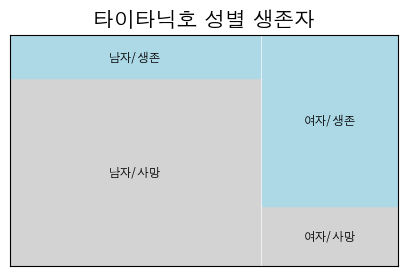

In [28]:
mosaic(df, ['Sex', 'Survived'], axes_label = False,
       properties = getColor, labelizer = getLabel)

plt.title('타이타닉호 성별 생존자', fontsize = 15)
plt.show()
plt.close()

람다식 사용 (lambda)
- `lambda` 파라미터이름: 리턴값

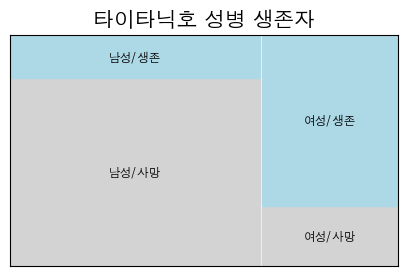

In [31]:
mosaic(df, ['Sex', 'Survived'], axes_label=False,
       properties = lambda key: {'color':'lightblue' if '1' in key else 'lightgray'},
       labelizer = lambda key: {('female', '1'): '여성/생존', ('female', '0'): '여성/사망',
                                ('male','1'): '남성/생존', ('male', '0'): '남성/사망'}[key])
plt.title('타이타닉호 성병 생존자', fontsize = 15)
plt.show()
plt.close()

### 4. 집단별 산점도 그래프
- `.scatterplot()`

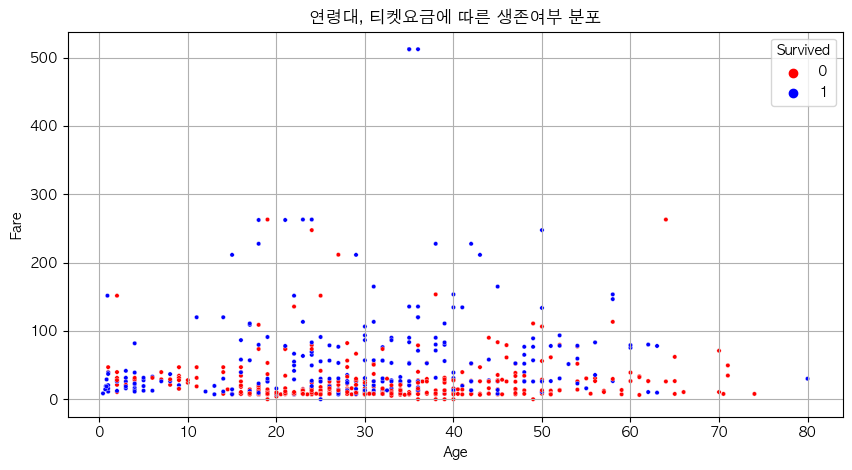

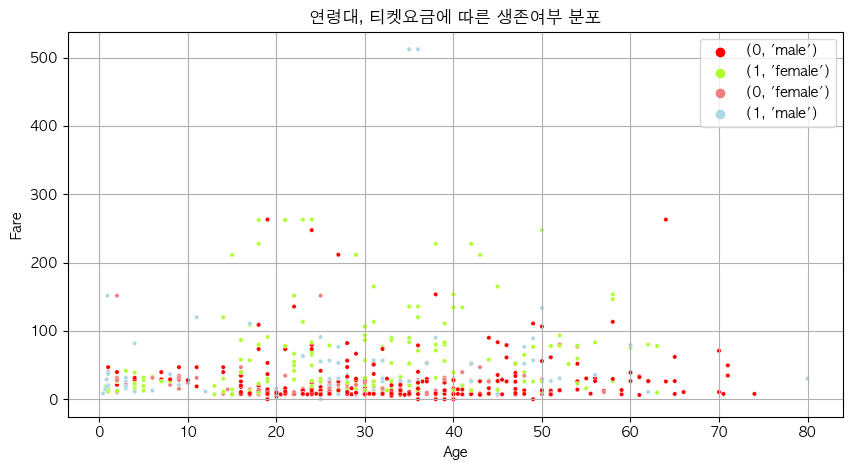

In [61]:
plt.rcParams["font.size"] = 10               # 기본 글자크기 설정
plt.rcParams["figure.figsize"] = (10, 5)    # 그래프 사이즈 (가로,세로)inch

sb.scatterplot(data = df, x = 'Age', y = 'Fare', hue = 'Survived', s=10) # s = 크기
plt.title('연령대, 티켓요금에 따른 생존여부 분포')
plt.grid()
plt.show()
plt.close()

sb.set_palette(sb.color_palette(['red', 'greenyellow', 'lightcoral', 'lightblue'])) # hue 색상 지정
sb.scatterplot(data=df, x='Age', y='Fare', hue=df[['Survived', 'Sex']].apply(tuple, axis=1), s=10)
plt.title("연령대, 티켓요금에 따른 생존여부 분포")
plt.grid()
plt.show()
plt.close()

### 5. 산점도 행렬
- `seaborn.pairplot(DataFrame)`
- : `각 변수를 교차`로 산점도 그래프를 나열한 형태
- 범주형 데이터는 자동으로 제외됨
- 왼쪽 상단에서 오른쪽 하단으로의 중앙에는 각 데이터의 히스토그램이 표시됨
- `diag_kind='kde'` 파라미터 추가 시 히스토그램 대신 커널밀도추정곡선을 표시함

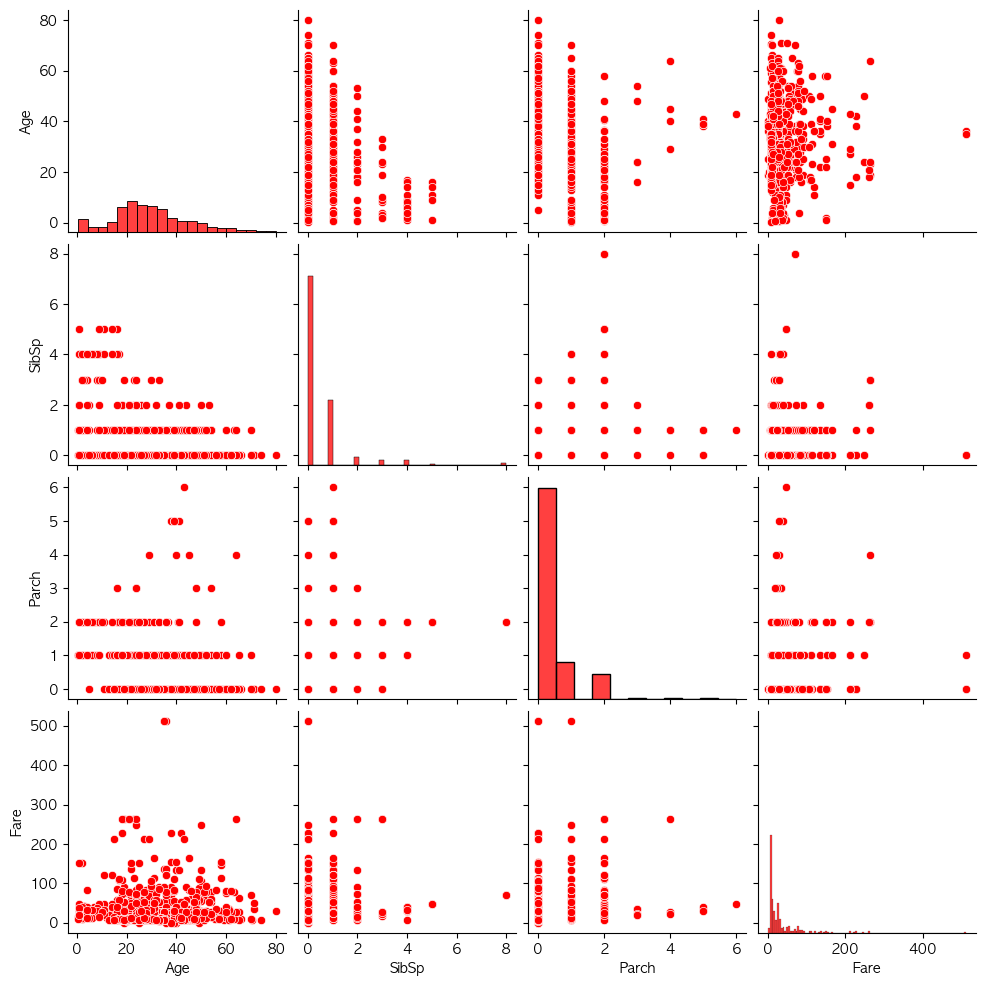

In [59]:
sb.pairplot(df)
plt.show()
plt.close()

> 설명: https://support.minitab.com/ko-kr/minitab/21/help-and-how-to/graphs/matrix-plot/interpret-the-results/key-results/